Warning message:
"패키지 'tidyverse'는 R 버전 4.1.3에서 작성되었습니다"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"패키지 'ggplot2'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'tibble'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'tidyr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'readr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'purrr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'dplyr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'stringr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'forcats'는 R 버전 4.1.3에서 작성되었습니다"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



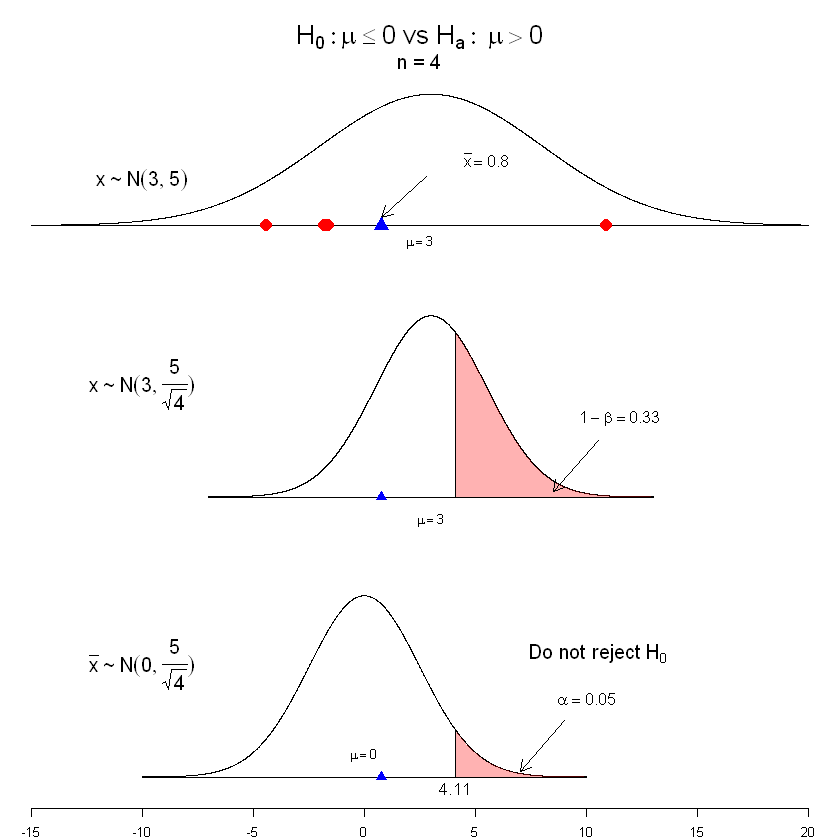

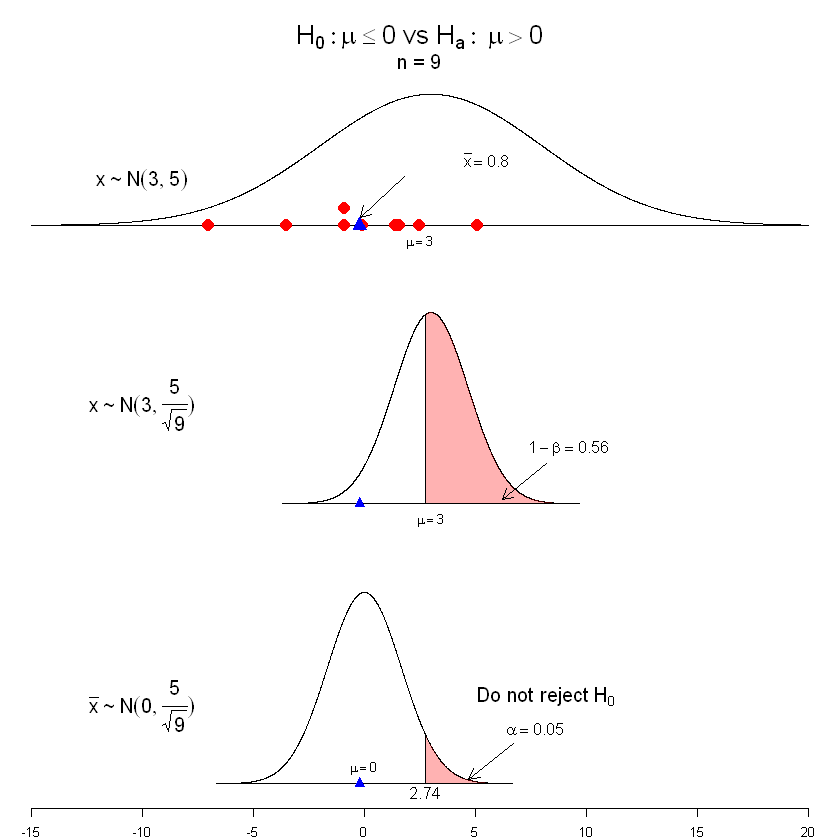

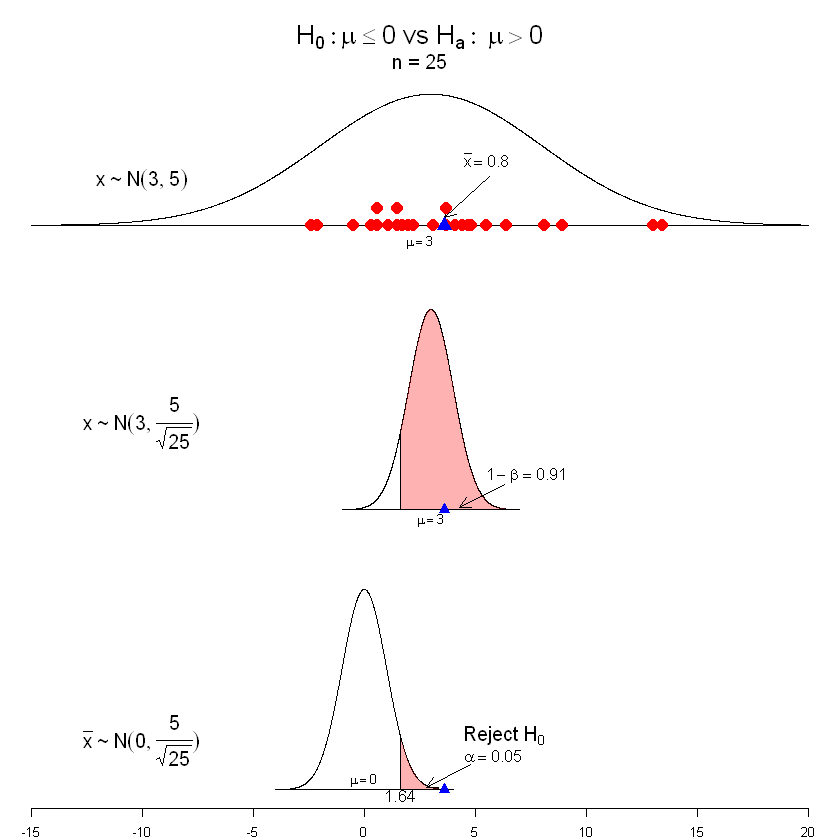

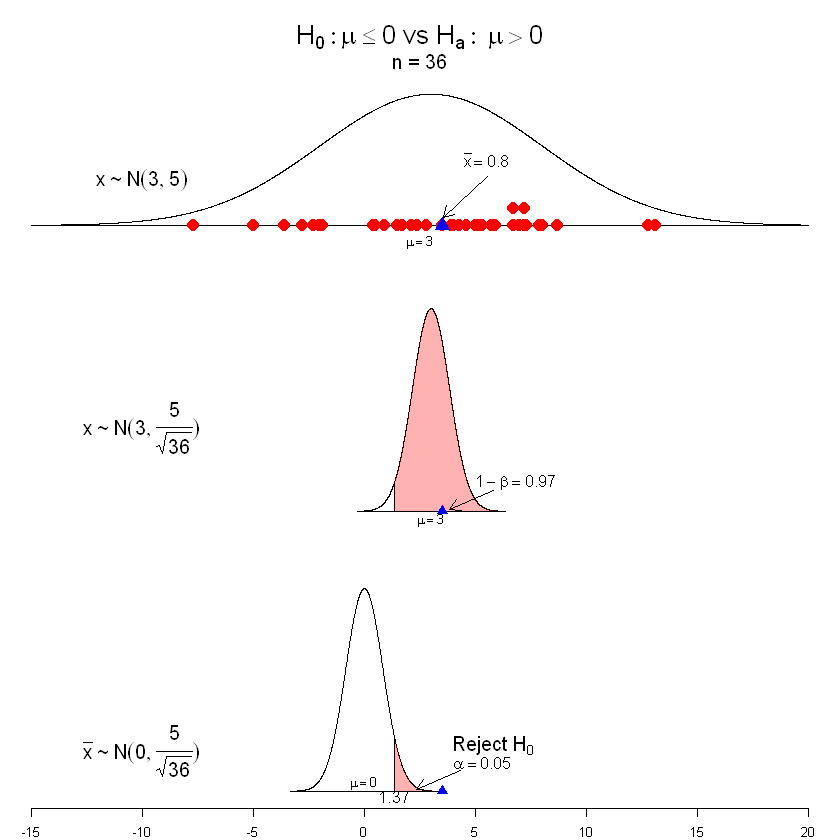

In [1]:
library(tidyverse)

power_of_test <- function(x, mu_0, mu_1, sigma){
    size = length(x) # 표본 크기를 구한다.
    SE = sigma / sqrt(size) # 표준 오차를 구한다.
    alpha = 0.05 # 유의수준이 0.05인 오른쪽 단측검정이다.
    CI_right = qnorm(1-alpha) * SE # 신뢰구간의 오른쪽 끝이면서 기각역의 왼쪽 끝이다.

    # 세 칸으로 나눈 뒤 그래프를 각각 그린다.
    par(mfrow = c(3, 1))
    par(mar = c(2, 0, 4.5, 0))
    x_limits = c(-15, 20) # 그래프 x축의 왼쪽 끝과 오른쪽 끝이다. 전체 그래프 공통

    # 첫 번째 그래프를 그리기 위해 좌표를 결정한다.
    graph1_x = seq(x_limits[1], x_limits[2], 0.01) 
    graph1_y = graph1_x %>% dnorm(mean = mu_1, sd = sigma)

    plot(graph1_x, graph1_y,
         type = 'l',
         xlim = x_limits,
         ylim = c(range(graph1_y)[1] - 0.01, range(graph1_y)[2] + 0.01),
         frame.plot = FALSE, # 그래프를 둘러싼 사각형을 제거한다.
         xaxt = 'n', yaxt ='n') # x축과 y축 눈금을 제거한다.
    
    title(bquote(H[0] : mu <= 0 ~ 'vs' ~ H[a] : ~ mu > 0), cex.main = 2) # 제목을 생성한다. 영가설과 대안가설
    mtext(bquote('n =' ~ .(size)), side =3) # 부제목을 생성한다 n = 4
    
    lines(range(graph1_x), c(0, 0)) # x축을 생성한다.
    
    text(-10, mean(graph1_y), cex = 1.5, bquote(x ~ '~' ~ N(3,5)))
    text(mean(graph1_x), -0.01, bquote(mu == 3), cex = 1)
    text(mean(graph1_x) + 3, 0.04, bquote(bar(x) == 0.8), cex = 1.2)
    
    arrows(mean(x) + 2, 0.03, mean(x) + 0.01, 0.005, length = 0.1)

    stripchart(x, method = 'stack', pch = 16, col = 'red', add = TRUE, at = 0, cex = 2)
    points(mean(x), 0, pch = 17, col = 'blue', cex = 2)

    # 두 번째 그래프를 그리기 위해 좌표를 결정한다.
    graph2_x = seq(mu_1 - 4*SE, mu_1 + 4*SE, 0.001)
    graph2_y = graph2_x %>% dnorm(mean = mu_1, sd = SE)
    
    par(mar = c(2, 0, 1, 0))
    
    plot(graph2_x, graph2_y,
        type = 'l',
        xlim = x_limits,
        ylim = c(range(graph2_y)[1] - 0.02, range(graph2_y)[2] + 0.01),
        frame.plot = FALSE, # 그래프를 둘러싼 사각형을 제거한다.
        xaxt = 'n', yaxt ='n') # x축과 y축 눈금을 제거한다. 
    
    lines(c(mu_1 - SE*4, mu_1 + SE*4), c(0, 0)) # x축을 생성한다.
    
    text(-10, mean(graph2_y) + 0.05, cex = 1.5, bquote(x ~ '~' ~ N(.(mu_1), frac(.(sigma),sqrt(.(size))))))
    text(mean(graph2_x), -0.02, bquote(mu == 3), cex = 1)

    CR_x2 = seq(CI_right, range(graph2_x)[2], 0.1) # 기각역
    CR_y2 = dnorm(CR_x2, mean = 3, sd = SE)
    
    polygon(c(CR_x2[1], CR_x2, 12), c(0, CR_y2, 0), lty=0, col="#FF00004D")
    lines(c(CR_x2[1], CR_x2[1]), c(0, CR_y2[1]))
    
    area_critical_region = 1-pnorm(CI_right, mean = mu_1, sd = SE) %>% round(2)
    
    arrows(mean(CR_x2) + 2, 0.05, mean(CR_x2), 0.005, length = 0.1)
    text(mean(CR_x2) + 3, 0.07, bquote(1 - beta == .(area_critical_region)), cex = 1.2)
    
    points(mean(x), 0, pch = 17, col = 'blue', cex = 1.5)
    
    # 세 번째 그래프를 그리기 위해 좌표를 결정한다.
    graph3_x = seq(mu_0 - SE*4, mu_0 + SE*4, 0.01)
    graph3_y = graph3_x %>% dnorm( mean = 0, sd = SE)
    
    par(mar = c(2, 0, 1, 0))
    
    plot(graph3_x, graph3_y,
        type = 'l',
        xlim = x_limits,
        ylim = c(range(graph3_y)[1] - 0.02, range(graph3_y)[2] + 0.01),
        frame.plot = FALSE, # 그래프를 둘러싼 사각형을 제거한다.
        yaxt ='n') # 위와 다르게 y축 눈금만 제거한다.
    
    lines(c(mu_0 - 4*SE, mu_0 + 4*SE), c(0,0)) # x축을 생성한다.

    CR_x3 = seq(CI_right, range(graph3_x)[2], 0.1) # 기각역의 x값
    CR_y3 = dnorm(CR_x3, mean = 0, sd = SE) # 기각역의 y값
    polygon(c(CR_x3[1], CR_x3 , 9), c(0, CR_y3, 0), lty=0, col="#FF00004D")
    lines(c(CR_x3[1], CR_x3[1]), c(0, CR_y3[1]))
    
    text(CI_right, -0.01, label = round(CI_right, 2), cex = 1.3)
    text(mean(graph3_x), 0.02, bquote(mu == 0), cex = 1)
    text(-10, mean(graph3_x) + 0.1, cex = 1.5, bquote(bar(x) ~ '~' ~ N(0, frac(5,sqrt(.(size))))))

    text(mean(CR_x3) + 3, 0.07, bquote(alpha == 0.05), cex = 1.2)
    arrows(mean(CR_x3) + 2, 0.05, mean(CR_x3), 0.005, length = 0.1)

    points(mean(x), 0, pch = 17, col = 'blue', cex = 1.5)
    
    Reject_or_not = NULL
    
    reject_or_not = ifelse(mean(x) < CI_right, 'Do not reject', 'Reject') # 영가설 기각 여부 결정
    text(mean(CR_x3) + 3.5, 0.11, bquote(.(reject_or_not) ~ H[0]), cex = 1.5)
        
    
}

set.seed(12)

mu_0 = 0
mu_1 = 3
sigma = 5

for (sample_size in c(4, 9, 25, 36)){
    x = rnorm(sample_size, mean = mu_1, sd = sigma) %>% round(1)
    power_of_test(x, mu_0, mu_1, sigma)
}